# Выбор локации для скважины

# Описание проекта #

Нужно решить, какие скважины выбрать в регионе разработки.

**Шаги для выбора локации обычно такие:**

* В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
* Строят модель для предсказания объёма запасов в новых скважинах;
* Выбирают скважины с самыми высокими оценками значений;
* Определяют регион с максимальной суммарной прибылью отобранных скважин.

**Шаги по выполнению проекта**

1. Загрузить и подготовьть данные. 

2. Обучить и проверьть модель для каждого региона.

3. Подготовьть данные для расчета прибыли.

4. Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
    
5. Посчитайте риски и прибыль для каждого региона:
 
**Описание данных**

* id — уникальный идентификатор скважины;
* f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
* product — объём запасов в скважине (тыс. баррелей).

**Условия задачи:**
1. Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
2. При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
3. Бюджет на разработку скважин в регионе — 10 млрд рублей.
4. При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
5. После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

*Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.*

## Загрузка и подготовка данных

Для начала импортируем все необходимые библиотеки.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Загрузим данные и посторим на пропуски и типы данных

In [2]:
region_1, region_2, region_3 = (
    pd.read_csv('/datasets/geo_data_0.csv'), 
    pd.read_csv('/datasets/geo_data_1.csv'), 
    pd.read_csv('/datasets/geo_data_2.csv'))

region_1.info()
region_2.info()
region_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null 

Пропусков нет, типы данных адекватные. 

Взглянем на полученные нами таблицы.

In [3]:
display('Регион 1:', region_1.head())
display('Регион 2:', region_2.head())
display('Регион 3:', region_3.head())

'Регион 1:'

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


'Регион 2:'

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


'Регион 3:'

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


На первый взгляд данные выглядят неплохо, продолжим изучать дальше.

Вызовем `.describe()` и посмотрим описательную статистику данных.

In [4]:
display('Регион 1:', region_1.describe())
display('Регион 2:', region_2.describe())
display('Регион 3:', region_3.describe())

'Регион 1:'

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


'Регион 2:'

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


'Регион 3:'

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Данные первого и третьего региона очень похожи и близки, второй немного отличается.

Проверим наличие дубликатов

In [5]:
display("Суммарное количество дубликатов в регионе №1: {:}".format(region_1.duplicated().sum()))
display("Суммарное количество дубликатов в регионе №2: {:}".format(region_2.duplicated().sum()))
display("Суммарное количество дубликатов в регионе №3: {:}".format(region_3.duplicated().sum()))

'Суммарное количество дубликатов в регионе №1: 0'

'Суммарное количество дубликатов в регионе №2: 0'

'Суммарное количество дубликатов в регионе №3: 0'

Построим диаграммы размаха и проверим наличие выбросов в данных.

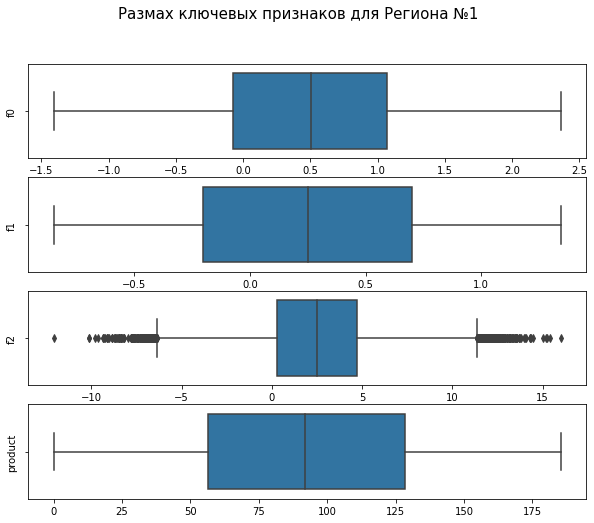

In [6]:
# Регион 1

fig, ax = plt.subplots(4, 1)
region_1_list = [region_1['f0'], region_1['f1'], region_1['f2'], region_1['product']]
ylabel = ['f0', 'f1', 'f2', 'product']

for index in range(4):
    sns.boxplot(x=region_1_list[index], ax=ax[index])
    ax[index].set(xlabel = '', ylabel = ylabel[index])

fig.set_figwidth(10)
fig.set_figheight(8)
fig.suptitle('Размах ключевых признаков для Региона №1', fontsize = 15)

plt.show()

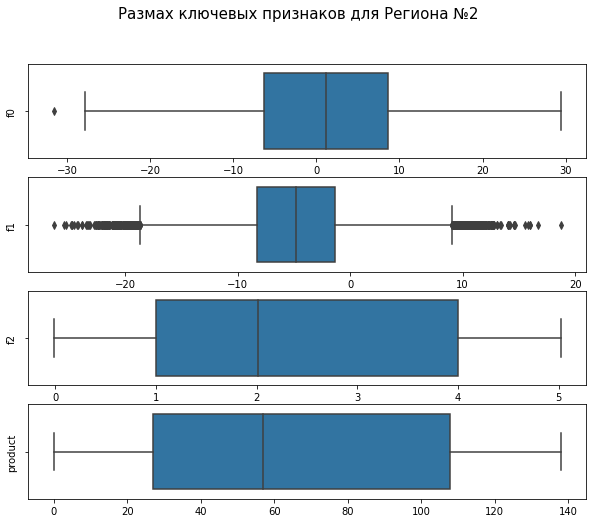

In [7]:
# Регион 2

fig, ax = plt.subplots(4, 1)
region_2_list = [region_2['f0'], region_2['f1'], region_2['f2'], region_2['product']]
ylabel = ['f0', 'f1', 'f2', 'product']

for index in range(4):
    sns.boxplot(x=region_2_list[index], ax=ax[index])
    ax[index].set(xlabel = '', ylabel = ylabel[index])

fig.set_figwidth(10)
fig.set_figheight(8)
fig.suptitle('Размах ключевых признаков для Региона №2', fontsize = 15)

plt.show()

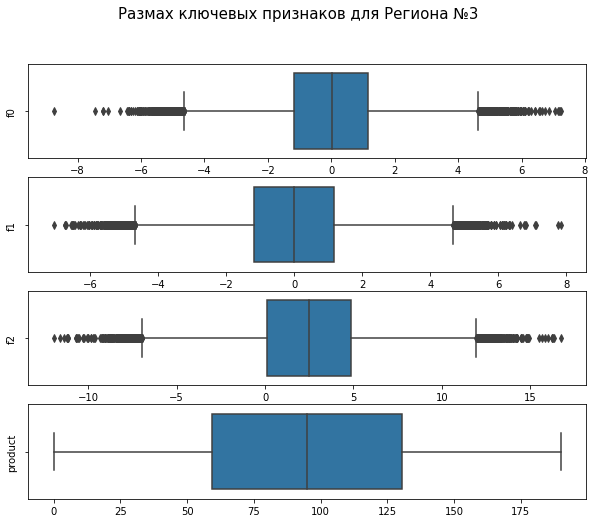

In [8]:
# Регион 3

fig, ax = plt.subplots(4, 1)
region_3_list = [region_3['f0'], region_3['f1'], region_3['f2'], region_3['product']]
ylabel = ['f0', 'f1', 'f2', 'product']

for index in range(4):
    sns.boxplot(x=region_3_list[index], ax=ax[index])
    ax[index].set(xlabel = '', ylabel = ylabel[index])

fig.set_figwidth(10)
fig.set_figheight(8)
fig.suptitle('Размах ключевых признаков для Региона №3', fontsize = 15)

plt.show()

**Вывод**

В столбце `product` видим, что выбросов нет по всем трем таблицам. В первом регионе выбросы имеются на признаке `f2`, во втором регионе - `f0` и `f1`, в третьем регионе - по всем трем признакам.

Определим количество выбросов в процентах.

In [9]:
region_name = [region_1, region_2, region_3]
columns_region = ['f0', 'f1', 'f2', 'product']
region_name_list = ['region_1', 'region_2', 'region_3']
outliers = []
count = 0
count_reg = 0
for i in region_name:
    for j in columns_region:
        
        lower_mustache = i[j].quantile(0.25) - 1.5 * (i[j].quantile(0.75) - i[j].quantile(0.25))
        upper_mustache = i[j].quantile(0.75) + 1.5 * (i[j].quantile(0.75) - i[j].quantile(0.25))
        sum_count = len(i.query('@i[@j] < @lower_mustache | @i[@j] > @upper_mustache').index)
        percent = sum_count / len(i[j])
        
        outliers.append([])
        outliers[count].append(region_name_list[count_reg]) 
        outliers[count].append(j) 
        outliers[count].append(lower_mustache)
        outliers[count].append(upper_mustache)
        outliers[count].append(sum_count)
        outliers[count].append(percent)
        count += 1
    count_reg += 1        
columns = ['region', 'features', 'lower_mustache', 'upper_mustache', 'sum_count', 'percent']

data_outliers = pd.DataFrame(outliers, columns=columns).groupby('region')['percent'].sum()
display(data_outliers)

region
region_1    0.00506
region_2    0.00637
region_3    0.02001
Name: percent, dtype: float64

**Вывод** 

Выбросов в первых двух таблицах меньше процента, во второй - 2. Думаю от этих объектов можем избавиться, чтобы они не влияли на модель.

In [10]:
# region_1
for j in columns_region:
    lower_mustache = region_1[j].quantile(0.25) - 1.5 * (region_1[j].quantile(0.75) - region_1[j].quantile(0.25))
    upper_mustache = region_1[j].quantile(0.75) + 1.5 * (region_1[j].quantile(0.75) - region_1[j].quantile(0.25))
    drop = region_1.query('@region_1[@j] < @lower_mustache | @region_1[@j] > @upper_mustache')
    region_1 = region_1.drop(drop.index)
region_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99494 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99494 non-null  object 
 1   f0       99494 non-null  float64
 2   f1       99494 non-null  float64
 3   f2       99494 non-null  float64
 4   product  99494 non-null  float64
dtypes: float64(4), object(1)
memory usage: 6.6+ MB


In [11]:
# region_2
for j in columns_region:
    lower_mustache = region_2[j].quantile(0.25) - 1.5 * (region_2[j].quantile(0.75) - region_2[j].quantile(0.25))
    upper_mustache = region_2[j].quantile(0.75) + 1.5 * (region_2[j].quantile(0.75) - region_2[j].quantile(0.25))
    drop = region_2.query('@region_2[@j] < @lower_mustache | @region_2[@j] > @upper_mustache')
    region_2 = region_2.drop(drop.index)
region_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99363 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99363 non-null  object 
 1   f0       99363 non-null  float64
 2   f1       99363 non-null  float64
 3   f2       99363 non-null  float64
 4   product  99363 non-null  float64
dtypes: float64(4), object(1)
memory usage: 6.6+ MB


In [12]:
# region_3
for j in columns_region:
    lower_mustache = region_3[j].quantile(0.25) - 1.5 * (region_3[j].quantile(0.75) - region_3[j].quantile(0.25))
    upper_mustache = region_3[j].quantile(0.75) + 1.5 * (region_3[j].quantile(0.75) - region_3[j].quantile(0.25))
    drop = region_3.query('@region_3[@j] < @lower_mustache | @region_3[@j] > @upper_mustache')
    region_3 = region_3.drop(drop.index)
region_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98003 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       98003 non-null  object 
 1   f0       98003 non-null  float64
 2   f1       98003 non-null  float64
 3   f2       98003 non-null  float64
 4   product  98003 non-null  float64
dtypes: float64(4), object(1)
memory usage: 6.5+ MB


## Обучение и проверка модели

Разобьем данные на обучающую и валидационную выборки и обучим модель.

In [13]:
features_r1 = region_1.drop(['id','product'], axis=1) 
target_r1 = region_1['product'] 

features_train_r1, features_valid_r1, target_train_r1, target_valid_r1 = train_test_split(
    features_r1, target_r1, test_size=0.25, random_state=12345) 

model_r1 = LinearRegression() 
model_r1 = model_r1.fit(features_train_r1,target_train_r1) 
predictions_valid_r1 = model_r1.predict(features_valid_r1) 
rmse_r1 = mean_squared_error(target_valid_r1, predictions_valid_r1)**0.5 

In [14]:
features_r2 = region_2.drop(['id','product'], axis=1)  
target_r2 = region_2['product'] 

features_train_r2, features_valid_r2, target_train_r2, target_valid_r2 = train_test_split(
    features_r2, target_r2, test_size=0.25, random_state=12345) 

model_r2 = LinearRegression() 
model_r2 = model_r2.fit(features_train_r2,target_train_r2) 
predictions_valid_r2 = model_r2.predict(features_valid_r2) 

rmse_r2 = mean_squared_error(target_valid_r2, predictions_valid_r2)**0.5

In [15]:
features_r3 = region_3.drop(['id','product'], axis=1) 
target_r3 = region_3['product'] 

features_train_r3, features_valid_r3, target_train_r3, target_valid_r3 = train_test_split(
    features_r3, target_r3, test_size=0.25, random_state=12345) 

model_r3 = LinearRegression() 
model_r3 = model_r3.fit(features_train_r3,target_train_r3)
predictions_valid_r3 = model_r3.predict(features_valid_r3) 

rmse_r3 = mean_squared_error(target_valid_r3, predictions_valid_r3)**0.5 

In [16]:
predict = [predictions_valid_r1, predictions_valid_r2, predictions_valid_r3]
rmse = [rmse_r1, rmse_r2, rmse_r3]

for i in range(3):
    display("Регион {:}".format(i+1))
    display("средний запас предсказанного сырья: {:.5}".format(predict[i].mean()))
    display("RMSE модели на валидационной выборке: {:.5}".format(rmse[i]))

'Регион 1'

'средний запас предсказанного сырья: 92.725'

'RMSE модели на валидационной выборке: 37.923'

'Регион 2'

'средний запас предсказанного сырья: 68.572'

'RMSE модели на валидационной выборке: 0.88903'

'Регион 3'

'средний запас предсказанного сырья: 94.677'

'RMSE модели на валидационной выборке: 40.177'

**Вывод**

Из обучения модели и определения RMSE видим, что ошибка меньше всего на регионе под номером 2, но и среднее количество запасов тут самые низкие; лидер по продукту третий регион, но у него самая большая ошибка.

## Подготовка к расчёту прибыли

In [17]:
DEVELOPMENT_BUDGET = 10**10 # Бюджет на разработку скважин в регионе
MAX_POINTS_RESEARCHES = 500 # Количество точек для разработки
BEST_POINTS_RESEARCHES = 200 # Количество точек лучших для разработки
INCOME_PER_BARREL = 450000 # Доход с единицы продукта
PROBABILITY_DAMAGE = 0.025 # Вероятность убытков
break_even_point = DEVELOPMENT_BUDGET / INCOME_PER_BARREL / BEST_POINTS_RESEARCHES
display("Точка безубыточности: {:.5}".format(break_even_point))

'Точка безубыточности: 111.11'

Посмотрим на описание данных во всех трех регионах и узнаем какие лучше всего подходят для определения прибыльности.

In [18]:
display('Регион 1:', region_1.describe())
display('Регион 2:', region_2.describe())
display('Регион 3:', region_3.describe())

'Регион 1:'

,f0,f1,f2,product
count,99494.000000,99494.000000,99494.000000,99494.000000
mean,0.500570,0.250044,2.503399,92.500677
std,0.871838,0.504437,3.181196,44.229330
min,-1.408605,-0.848218,-6.352956,0.000000
25%,-0.072378,-0.201063,0.301496,56.567678
50%,0.502606,0.250032,2.516336,91.842533
75%,1.073729,0.700574,4.704256,128.517876
max,2.362331,1.343769,11.353804,185.364347


'Регион 2:'

,f0,f1,f2,product
count,99363.000000,99363.000000,99363.000000,99363.000000
mean,1.139991,-4.803164,2.493946,68.809494
std,8.965792,4.984094,1.703243,45.934977
min,-27.829616,-18.667777,-0.018144,0.000000
25%,-6.300443,-8.249878,1.000016,26.953261
50%,1.150112,-4.816752,2.011366,57.085625
75%,8.621033,-1.363801,3.999893,107.813044
max,29.421755,9.050688,5.019721,137.945408


'Регион 3:'

,f0,f1,f2,product
count,98003.000000,98003.000000,98003.000000,98003.000000
mean,0.000788,-0.002182,2.494648,94.785072
std,1.679981,1.681475,3.389780,44.685282
min,-4.640830,-4.676782,-6.944602,0.000000
25%,-1.153136,-1.164226,0.147699,59.330119
50%,0.008893,-0.009345,2.482845,94.696578
75%,1.148220,1.155001,4.841025,130.319425
max,4.637965,4.670610,11.945919,190.029838


**Вывод**

По описанию данных можно заметить, что во всех трех регионах есть значения, которые превосходят точку безубыточности, правда все они расположены в верхнем квартиле данных. Посмотрим на графике.

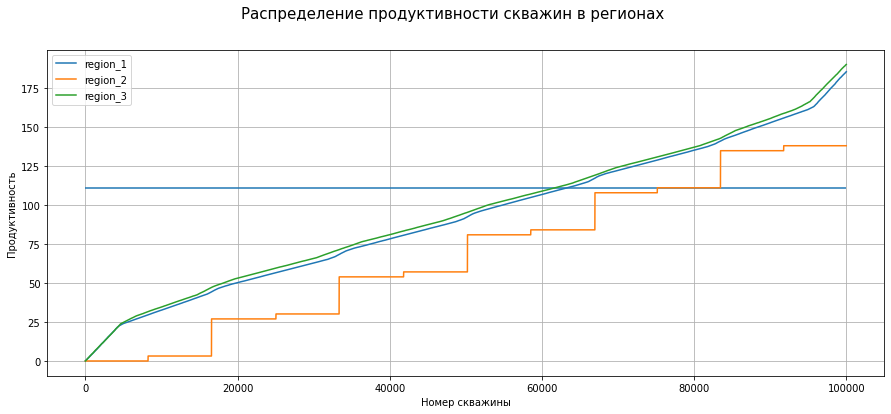

In [19]:
fig, ax = plt.subplots()

fig.set_figwidth(15)
fig.set_figheight(6)
fig.suptitle('Распределение продуктивности скважин в регионах', fontsize = 15)

for index in range(3):
    x = region_name[index].index
    y = region_name[index]['product'].sort_values()

    ax.plot(x, y, label=region_name_list[index])

ax.legend()
ax.set_xlabel('Номер скважины')
ax.set_ylabel('Продуктивность')
ax.grid()
ax.hlines(break_even_point, 0, 100000)

plt.show()

**Вывод**

По графику видим, что значения выше точки безубыточности имеются, попробуем посчитать их количество.

In [20]:
profitable_points = []
for index in range(3):
    count_profitable_points = region_name[index]['product'].loc[region_name[index]['product'] >= break_even_point].count().sum()
    profitable_points.append([])
    profitable_points[index].append(region_name_list[index])
    profitable_points[index].append(count_profitable_points)

columns = ['region', 'count_profitable_points']
profitable_points = pd.DataFrame(profitable_points, columns=columns)
display(profitable_points)

,region,count_profitable_points
0,region_1,36583
1,region_2,16537
2,region_3,38178


**Вывод**

Да, действительно значения выше точки бузубыточности имеются и их почти треть в первом и третьем регионе, во втором - почти в половину меньше.

## Расчёт прибыли и рисков 

Объявим функцию, которая будет принимать предсказаные значения и будет возвращать предполагаемую прибыль.

In [21]:
def profit (predict, target):
    predict_sorted = pd.Series(predict, copy=False).sort_values(ascending=False)[:BEST_POINTS_RESEARCHES]
    target_sort = (target.reset_index(drop = True)[predict_sorted.index])
    profit = (target_sort.sum() * INCOME_PER_BARREL) - DEVELOPMENT_BUDGET
    return profit

In [22]:
display("Прибыль первого района, в млн. руб.: {:.7}".format(profit(predictions_valid_r1, target_valid_r1) / 10**6))
display("Прибыль второго района, в млн. руб.: {:.7}".format(profit(predictions_valid_r2, target_valid_r2) / 10**6))
display("Прибыль третьего района, в млн. руб.: {:.7}".format(profit(predictions_valid_r3, target_valid_r3) / 10**6))

'Прибыль первого района, в млн. руб.: 3346.906'

'Прибыль второго района, в млн. руб.: 2415.087'

'Прибыль третьего района, в млн. руб.: 2459.604'

In [23]:
def confidence_interval(predictions_valid, target_conf):
    state = np.random.RandomState(12345)

    values = []
    for i in range(1000):
        predictions_subsample = pd.Series(predictions_valid).sample(n=MAX_POINTS_RESEARCHES, replace=True, random_state=state)
        values.append(profit(predictions_subsample, target_conf))
    
    values = pd.Series(values)
    display('Риск убытков, в % -  {:.5}'.format(round((values < 0).mean()*100, 3)))
   
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    mean = values.mean()
    display("Средняя прибыль: {}".format(round(mean, 2)))
    return (round(lower,2), round(upper,2))

In [24]:
# Прибыль и риск убытков на предсказаных данных.
target = [target_valid_r1, target_valid_r2, target_valid_r3]

for index in range(3):
    display('========================================================')
    display(region_name_list[index])
    display("95% доверительный итервал", confidence_interval(predict[index], target[index]))
    display('========================================================')

'========================================================'

'region_1'

'Риск убытков, в % -  9.1'

'Средняя прибыль: 365761564.96'

'95% доверительный итервал'

(-164254187.64, 893337075.24)

'========================================================'

'========================================================'

'region_2'

'Риск убытков, в % -  1.4'

'Средняя прибыль: 440566304.11'

'95% доверительный итервал'

(22419279.98, 821766440.74)

'========================================================'

'========================================================'

'region_3'

'Риск убытков, в % -  9.5'

'Средняя прибыль: 355720405.02'

'95% доверительный итервал'

(-166964944.68, 854473260.03)

'========================================================'

In [25]:
def profit_table(predict_table, target_table):
    state = np.random.RandomState(12345)
    profit_table = []

    for index in range(3):
        values = []
        for i in range(1000):
            predictions_subsample = (
                pd.Series(predict_table[index])
                .sample(n=MAX_POINTS_RESEARCHES, 
                        replace=True, random_state=state))
            values.append(profit(predictions_subsample, target_table[index]))

        values = pd.Series(values)
        damages = round((values < 0).mean()*100, 3)

        lower = values.quantile(0.025) / 10**6
        upper = values.quantile(0.975) / 10**6
        mean = values.mean() / 10**6
        profit_table.append([])
        profit_table[index].append(region_name_list[index])
        profit_table[index].append(damages)
        profit_table[index].append(mean)
        profit_table[index].append(lower)
        profit_table[index].append(upper)
    columns = ['region', 'damages', 'mean_profit', 'lower_confidence_interval', 'upper_confidence_interval']
    data_profit_predict = pd.DataFrame(profit_table, columns=columns)
    return data_profit_predict

In [26]:
total_table = profit_table(predict, target)
color_columns = ['mean_profit', 'lower_confidence_interval', 'upper_confidence_interval']

display(total_table
        .style
        .format({'damages': '{:.2f} %',
                 'mean_profit': '{:.2f} млн. ₽',
                 'lower_confidence_interval': '{:.2f} млн. ₽',
                 'upper_confidence_interval': '{:.2f} млн. ₽'})        
        .highlight_max(color='yellowgreen', subset=color_columns)
        .highlight_min(color='coral', subset=color_columns)
        .highlight_max(color='coral', subset=['damages'])
        .highlight_min(color='yellowgreen', subset=['damages']))

,region,damages,mean_profit,lower_confidence_interval,upper_confidence_interval
0,region_1,9.10 %,365.76 млн. ₽,-164.25 млн. ₽,893.34 млн. ₽
1,region_2,1.70 %,433.96 млн. ₽,42.39 млн. ₽,840.91 млн. ₽
2,region_3,10.40 %,345.03 млн. ₽,-215.80 млн. ₽,896.61 млн. ₽


**Вывод**

После всех расчетов можем рекомендовать к разработке только второй регион, так как он проходит порог риска убытков в 2,5 % с уровнем 1,7%. Средняя прибыль самая высокая по всем регионам и  равна 433,96 млн. руб. 95 % доверительный интервал находится на уровне: 42.39 млн. руб - 840.91 млн. руб.